In [31]:
from keras.datasets import mnist
import numpy as np
np.random.seed(1337)
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.models import load_model

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255. - 0.5
X_test = X_test.astype('float32') / 255. - 0.5
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [20]:
encoding_dim = 2
input_img = Input(shape = (784,))

In [22]:
#encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation = 'relu')(encoded)
encoded = Dense(10, activation = 'relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)



In [23]:
#decoder
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)



In [24]:
auto_encoder = Model(input = input_img, output = decoded)
encoder = Model(input = input_img, output = encoder_output)
auto_encoder.compile(optimizer = 'adam', loss = 'mse')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  


In [27]:
auto_encoder.fit(X_train, X_train, epochs = 5, batch_size = 256, shuffle = True)

Epoch 1/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0500
Epoch 2/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.0484
Epoch 3/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.0473: 0s - loss: 0.
Epoch 4/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.0464
Epoch 5/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0456


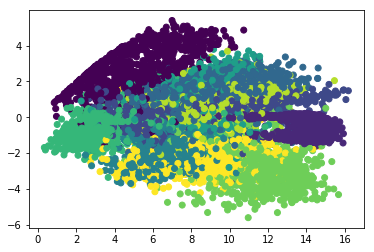

In [30]:
import matplotlib.pyplot as plt
encoded_img = encoder.predict(X_test)
plt.scatter(encoded_img[:,0], encoded_img[:, 1], c = y_test)
